In [1]:
import pandas as pd
import numpy as np
import matplotlib
pd.set_option('display.max_rows', 500)

%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import LabelKFold
from scipy import interp
from sklearn import cross_validation
import pylab as pl

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from os import environ
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
import os
dfs = []
for i in os.listdir("C:\\temp\\backup\\dialogs_csv\\"):
    df = pd.read_csv("C:\\temp\\backup\\dialogs_csv\\"+i)
    dfs.append(df)
all_df = pd.concat(dfs)
all_df.to_csv("C:\\temp\\backup\\dialogs_csv\\all_df.csv")



In [6]:
df = all_df.copy()

In [3]:
df = pd.read_csv("c:\\temp\\all_df.csv")
list(df)

['Unnamed: 0',
 'Unnamed: 0.1',
 'avg_turn_secs',
 'avg_turn_words',
 'dialog',
 'end',
 'href',
 'id',
 'niteType',
 'p_da',
 'p_speaker',
 'precent_secs_sofar',
 'precent_words_sofar',
 'secs',
 'speaker',
 'start',
 'swbdType',
 'tend',
 'tid',
 'time_control',
 'time_sofar',
 'tstart',
 'words',
 'words_control',
 'words_sofar']

In [7]:
df2 = df[['dialog','id','tid','precent_secs_sofar','secs','precent_words_sofar','words_control','time_control','speaker','p_speaker','p_da','swbdType']]
df3 =df2.dropna()
df3.head()

,dialog,id,tid,precent_secs_sofar,secs,precent_words_sofar,words_control,time_control,speaker,p_speaker,p_da,swbdType
3,sw2005,da4,t3,4.378109,0.440000,3.703704,36.0,50.352909,A,B,sv,aa
4,sw2005,da5,t4,4.625787,0.326500,34.782609,63.0,49.647091,A,A,aa,aa
5,sw2005,da6,t4,41.461784,4.108500,30.434783,63.0,49.647091,B,A,aa,sd
6,sw2005,da7,t4,51.972298,0.676125,39.130435,63.0,49.647091,B,B,sd,%-
7,sw2005,da8,t4,75.485979,2.249125,58.695652,63.0,49.647091,B,B,%-,sd


In [8]:
#remove the dates
df3['tchange'] = 0
df3.loc[df3['speaker'] != df3['p_speaker'], 'tchange'] = 1
df3.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,dialog,id,tid,precent_secs_sofar,secs,precent_words_sofar,words_control,time_control,speaker,p_speaker,p_da,swbdType,tchange
3,sw2005,da4,t3,4.378109,0.440000,3.703704,36.0,50.352909,A,B,sv,aa,1
4,sw2005,da5,t4,4.625787,0.326500,34.782609,63.0,49.647091,A,A,aa,aa,0
5,sw2005,da6,t4,41.461784,4.108500,30.434783,63.0,49.647091,B,A,aa,sd,1
6,sw2005,da7,t4,51.972298,0.676125,39.130435,63.0,49.647091,B,B,sd,%-,0
7,sw2005,da8,t4,75.485979,2.249125,58.695652,63.0,49.647091,B,B,%-,sd,0


In [9]:
dact_map = {
 'sd'  : 'SD',
 'b'   : 'B',
'sv'   : 'SV',
'aa'   : 'AA',
'%'    : '%' ,
'ba'   : 'SD',
'qy'   : 'Q',
'x'    : 'B',
'ny'   : 'A',
'fc'   : 'NA',
'uh'   : 'B',
'qw'   : 'Q',
'nn'   : 'A',
'bk'   : 'B',
'h'    : 'SD',
'qy^d' : 'Q',
'fw'   : 'Other',
'bh'   : 'B',
'^q'   : 'SD',
'bf'   : 'SD',
'ny^e' : 'A',
'ad' : 'SV',
'^2' : 'NA',
'b^m' : 'NA',
'qo' : 'Q',
'qh' : 'Q',
'^h' : 'A',
'ar' : 'A',
'nn^e' : 'A',
'ng' : 'A',
'br' : 'SD',
'no' : 'A',
'fp' : 'NA',
'qrr' : 'Q',
'arp' :'A',
't3' :'NA',
'oo' : 'NA',
'cc' : 'NA',
'co' : 'NA',
't1' : 'SD',
'bd' : 'SD',
'aap' : 'A',
'am'  : 'A' , 
'^g' : 'Q',
'qw^d': 'Q',
'fa' :'SD',
'%-' : '%', 
'aa^r' :'AA', 
'+@' : '+', 
'b^r':'B', 
'fe' : 'NA', 
'sd@' : 'SD', 
'o' :'NA', 
'sd(^q)' :'SD', 
'qy^t':'Q', 
'na^t' :'NA', 
'sd^e' : 'SD', 
'qr' : 'Q',
'sd^r' : 'SD', 
'na' : 'NA', 
'^h@':'NA', 
'sd^t' : 'SD', 
'fc^m' : 'NA', 
'qy^g^t' : 'Q', 
'br^m' : 'Q', 
'sv^r' : 'SV',
'sv^t' :'SV', 
'sd^c' : 'SD', 
'qy^h' : 'Q', 
'qw^t' : 'Q', 
'qy^g' : 'Q', 
'o@' :'NA', 
'ad^t' : 'AD', 
'nd' :'A', 
'sd^m' :'SD',
'"' : 'NA', 
'sv^e' :'SV', 
'sv(^q)' : 'SV', 
'%@' : '%', 
'ba^r' :'B', 
'^q@' :'Q', 
'qy^d^r' : 'Q', 
'nd^t': 'A',
't1^t' : 'NA', 
'qw^h' : 'Q', 
'ny^r' :'A', 
'^2@' : 'NA', 
'qy@' : 'Q', 
'ar^r' : 'B', 
'bk^r' :'B', 
'Other':'NA',
'nn^r' : 'NA', 
'b@':'B', 
'o^r' : 'NA', 
'bh^r' :'B', 
'bc' :'B', 
'qo^t' : 'Q', 
'sd*' : 'SD', 
'sv@' : 'SV', 
'sv^m' : 'SV',
'qy^m' : 'Q', 
'b^m@' :'B', 
'bh^m' :'B', 
'qy^c' : 'Q', 
'sv^c' : 'SV', 
'qy^c^r' : 'Q', 
'qw^d^c' : 'Q',
'qy^g^c' : 'Q', 
'qy^d@'  : 'Q', 
'ft':'NA', 
'sd^e^m' : 'SD', 
'aa^2' :'AA', 
'aa^m' :'AA', 
'qr^t' :'Q', 
'fc^t' :'NA',
'+*' :'+', 
'bk^m':'B' , 
'fc^r' : 'NA', 
'qy^r' : 'Q', 
'na^m' :'A', 
'sv^2' : 'SV', 
'ba@' : 'B', 
'sd^2' :'SD', 
'aa@' : 'AA',
'na^r' : 'NA', 
'sd(^q)^t' : 'SD', 
'na@' : 'NA', 
'qrr^t' : 'Q', 
'sd^e^t' : 'SD', 
'by' : 'B', 
'ad(^q)': 'AD', 
'no@' : 'A',
'ft^m' : 'NA', 
'qy^2' : 'Q',    
'Other' : 'NA',
'sd(^q)*' : 'SD', 
'qh^c' : 'Q',
'am^r' : 'A', 
'bf^t' : 'B', 
'br^r' : 'B', 
'Other' : 'NA', 
'qw^r' :'Q', 
'ad^c' : 'AD', 
'sd^e@' : 'SD',
'ng^m'  : 'A', 
'qr^d' : 'Q', 
'bf^g' : 'B', 
'nn^m' : 'B', 
'ft^t' : 'NA', 
'qh^g' : 'Q'   
  
}
#replace my da
s_da = df3['swbdType']
new_s_da = s_da.replace(dact_map)
# The values 10 and 20 are replaced by 'A' and 'B'
s_p_da = df3['p_da']
new_s_p_da = s_p_da.replace(dact_map)

df3['new_da'] = new_s_da
df3['new_p_da'] = new_s_p_da

df3.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dialog,id,tid,precent_secs_sofar,secs,precent_words_sofar,words_control,time_control,speaker,p_speaker,p_da,swbdType,tchange,new_da,new_p_da
3,sw2005,da4,t3,4.378109,0.440000,3.703704,36.0,50.352909,A,B,sv,aa,1,AA,SV
4,sw2005,da5,t4,4.625787,0.326500,34.782609,63.0,49.647091,A,A,aa,aa,0,AA,AA
5,sw2005,da6,t4,41.461784,4.108500,30.434783,63.0,49.647091,B,A,aa,sd,1,SD,AA
6,sw2005,da7,t4,51.972298,0.676125,39.130435,63.0,49.647091,B,B,sd,%-,0,%,SD
7,sw2005,da8,t4,75.485979,2.249125,58.695652,63.0,49.647091,B,B,%-,sd,0,SD,%


In [15]:
df4 = df3[['dialog', 
           'precent_secs_sofar',
           'precent_words_sofar',
           'words_control',
           'time_control',
           'new_da',
           'new_p_da',
           'tchange',
          'speaker']]
df5 = df4.copy()
df5.new_da = df5.new_da.str.strip(' ')
df5.new_p_da = df5.new_p_da.str.strip(' ')
df6 = df5[df5.new_da !='Other'] 
df7 = df6[df6.new_da !='AD'] 
df8 = df7[df7.new_p_da != 'Other']
df9 = df8[df8.new_p_da != 'AD']
df10 = df9.rename(columns={'new_p_da': 'p_da', 'new_da': 'da','turn_change':'tchange','dial':'dialog'})
df10.head()

,dialog,precent_secs_sofar,precent_words_sofar,words_control,time_control,da,p_da,tchange,speaker
3,sw2005,4.378109,3.703704,36.0,50.352909,AA,SV,1,A
4,sw2005,4.625787,34.782609,63.0,49.647091,AA,AA,0,A
5,sw2005,41.461784,30.434783,63.0,49.647091,SD,AA,1,B
6,sw2005,51.972298,39.130435,63.0,49.647091,%,SD,0,B
7,sw2005,75.485979,58.695652,63.0,49.647091,SD,%,0,B


In [16]:
df_data = df10.get([ 'dialog',
                     'speaker',
                     'tchange',
                    'precent_secs_sofar',
                    'precent_words_sofar',
                    'time_control', 
                    'words_control'])

In [17]:
act_dummmies = pd.get_dummies(df10.da, prefix='Act')
p_act_dummies = pd.get_dummies(df10.p_da,prefix="PAct")
act_dummmies.head()

,Act_%,Act_+,Act_A,Act_AA,Act_B,Act_NA,Act_Q,Act_SD,Act_SV,Act_aap^r,Act_ad@,Act_bf*,Act_bf^r,Act_bh@,Act_bk@,Act_fa^t,Act_fp^m,Act_ny^t,Act_qh^h,Act_qh^m
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data = pd.concat([df_data,act_dummmies,p_act_dummies],axis=1)
data.head()

,dialog,speaker,tchange,precent_secs_sofar,precent_words_sofar,time_control,words_control,Act_%,Act_+,Act_A,...,PAct_NA,PAct_Q,PAct_SD,PAct_SV,PAct_bf^r,PAct_bh@,PAct_bk@,PAct_fp^m,PAct_ny^t,PAct_qh^h
3,sw2005,A,1,4.378109,3.703704,50.352909,36.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sw2005,A,0,4.625787,34.782609,49.647091,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,sw2005,B,1,41.461784,30.434783,49.647091,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,sw2005,B,0,51.972298,39.130435,49.647091,63.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,sw2005,B,0,75.485979,58.695652,49.647091,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import RobustScaler

def scale(diag_name,main_df) :
    main_df_for_dialog = main_df[main_df.dialog == diag_name]
    df_speaker_A = main_df_for_dialog[main_df_for_dialog.speaker == 'A']
    df_speaker_B = main_df_for_dialog[main_df_for_dialog.speaker == 'B']
    
    # -------------- for A 
    
    #precent secs so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.precent_secs_sofar.reshape(-1,1))
    df_speaker_A.precent_secs_sofar = scaler.transform(df_speaker_A.precent_secs_sofar.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.precent_words_sofar.reshape(-1,1))
    df_speaker_A.precent_words_sofar = scaler.transform(df_speaker_A.precent_words_sofar.reshape(-1,1))
    #time control
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.time_control.reshape(-1,1))
    df_speaker_A.time_control = scaler.transform(df_speaker_A.time_control.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.words_control.reshape(-1,1))
    df_speaker_A.words_control = scaler.transform(df_speaker_A.words_control.reshape(-1,1))
    
    # -------------- for B 
    
    #precent secs so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.precent_secs_sofar.reshape(-1,1))
    df_speaker_B.precent_secs_sofar = scaler.transform(df_speaker_B.precent_secs_sofar.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.precent_words_sofar.reshape(-1,1))
    df_speaker_B.precent_words_sofar = scaler.transform(df_speaker_B.precent_words_sofar.reshape(-1,1))
    #time control
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.time_control.reshape(-1,1))
    df_speaker_B.time_control = scaler.transform(df_speaker_B.time_control.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.words_control.reshape(-1,1))
    df_speaker_B.words_control = scaler.transform(df_speaker_B.words_control.reshape(-1,1))
    
    frames = [df_speaker_A, df_speaker_B]
    return pd.concat(frames)

df_dialogs = data[['dialog','tchange']]
gb = df_dialogs.groupby('dialog').count()
gb.head()
gb2 = gb.reset_index()
after = []
for index,row in gb2.iterrows(): #This is where I'd like to go through rows of a series
        diag_name = row['dialog']
        new_df = scale(diag_name,data.copy())
        after.append(new_df)
        
       

df_both = pd.concat(after)

In [20]:
df_both['hash'] = df_both['dialog'].apply(hash)
df_both.head()

,dialog,speaker,tchange,precent_secs_sofar,precent_words_sofar,time_control,words_control,Act_%,Act_+,Act_A,...,PAct_Q,PAct_SD,PAct_SV,PAct_bf^r,PAct_bh@,PAct_bk@,PAct_fp^m,PAct_ny^t,PAct_qh^h,hash
3,sw2005,A,1,-0.448753,-0.533326,-0.688657,-1.681818,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1604832869
4,sw2005,A,0,-0.447071,-0.324321,-0.753659,0.772727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1604832869
9,sw2005,A,1,-0.417776,-0.474171,-0.442333,-1.227273,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1604832869
21,sw2005,A,1,-0.441875,-0.498895,-3.847030,-3.772727,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1604832869
22,sw2005,A,0,-0.478485,-0.421874,2.382471,2.863636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1604832869


In [21]:
labels_s = df_both['hash']
labels = labels_s.values
label_kfold = LabelKFold(labels,n_folds=10)

In [22]:
tchange_column = df_both['tchange']
target = tchange_column.values
del df_both['tchange']

In [24]:
#base line
from sklearn.cross_validation import LabelKFold

X_only_act = df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV']]

base_line_features_array = X_only_act.values

In [26]:
X_both_acts = df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
   ]]

both_acts_features_array = X_both_acts.values

In [27]:
X_only_numeric = df_both[[
     'precent_secs_sofar',
     'precent_words_sofar',
     'time_control',
     'words_control' , 
    ]]

summary_features_array = X_only_numeric.values

In [28]:
X_all =  df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
   ]]

all_features_array = X_all.values

In [29]:
len(all_features_array)

32174

In [30]:
result = dict()

In [31]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, all_features_array, target, cv=label_kfold,scoring='roc_auc')
result['all_features_array_auc'] = np.mean(x)

In [33]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, summary_features_array, target, cv=label_kfold,scoring='roc_auc')
result['summary_features_array_auc'] = np.mean(x)

In [35]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, both_acts_features_array, target, cv=label_kfold,scoring='roc_auc')
result['both_acts_features_array_auc'] = np.mean(x)

In [36]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, base_line_features_array, target, cv=label_kfold,scoring='roc_auc')
result['base_line_features_array_auc'] = np.mean(x)

In [37]:
result


{'all_features_array_auc': 0.83046569863547448,
 'base_line_features_array_auc': 0.654468475825145,
 'both_acts_features_array_auc': 0.80669454633157556,
 'summary_features_array_auc': 0.68900405940360931}

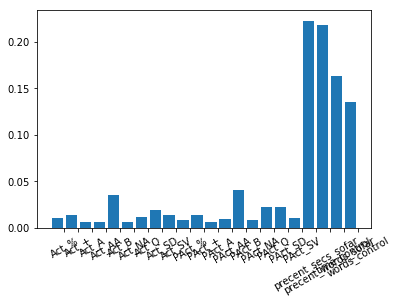

In [94]:
xTrain, xTest, yTrain, yTest = train_test_split(all_features_array, target, test_size=0.30,  random_state=531)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xTrain,yTrain)

feature_names = X_all.columns.values
x = np.arange(len(feature_names))
plt.bar(x, rf.feature_importances_)
_ = plt.xticks(x + 0.5, feature_names, rotation=30)